## Logistic Regression model

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
# Get information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  DIAGNOSIS              

<AxesSubplot:>

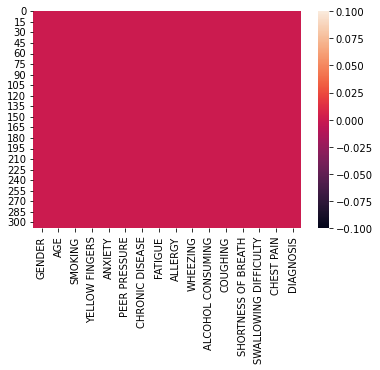

In [4]:
# Cleaning the dataset in order to remove any empty column if there is any by plotting a heatmap
sns.heatmap(data.isnull())

In [5]:
# Remove unwanted columns from our dataset
data = data.drop(["GENDER", "AGE"], axis=1)
data.head()

,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [6]:
# Divide the dataset into predictors and target variable

# Predictors
X = data.drop(["DIAGNOSIS"], axis=1)

# Target variable
y = data["DIAGNOSIS"] 

## Normalisation of data - not needed in this case as values are already between 0 and 1

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[-1.13529242,  0.86929961,  1.0032415 , ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.88083033, -1.15035137, -0.99676897, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.13529242, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.88083033, -1.15035137, -0.99676897, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.88083033, -1.15035137,  1.0032415 , ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-1.13529242, -1.15035137, -0.99676897, ..., -1.33558369,
         1.06350105, -1.12047956]])

## Divide data into training and testing parts

In [9]:
# In this case we will be testing on 30% of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training the model

In [10]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable based on the test data
y_predict = lr.predict(X_test)

In [11]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [12]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
172    1
250    1
19     0
146    1
79     1
Name: DIAGNOSIS, Length: 93, dtype: int64

## Evaluation of the model

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.98


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



In [15]:
lr.score(X_test, y_test)

0.978494623655914

## SVM model

In [16]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# predict the target variable based on the test data
y_predict = svm.predict(X_test)

# Computing the accuracy score using a different method
svm.score(X_test, y_test)

0.967741935483871

In [17]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [18]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
172    1
250    1
19     0
146    1
79     1
Name: DIAGNOSIS, Length: 93, dtype: int64